In [196]:
#import libraries 

import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
df=pd.read_csv("segmentation data.csv", index_col=0)

In [4]:
df.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0


### EDA

In [5]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Correlation estimate 

In [6]:
#Pearson 

df.corr()
#0 -> not dependent
#lower part of the table  
#Age and education 0.65 
#occupation and education 0.64
#Occupation and income 0.68 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


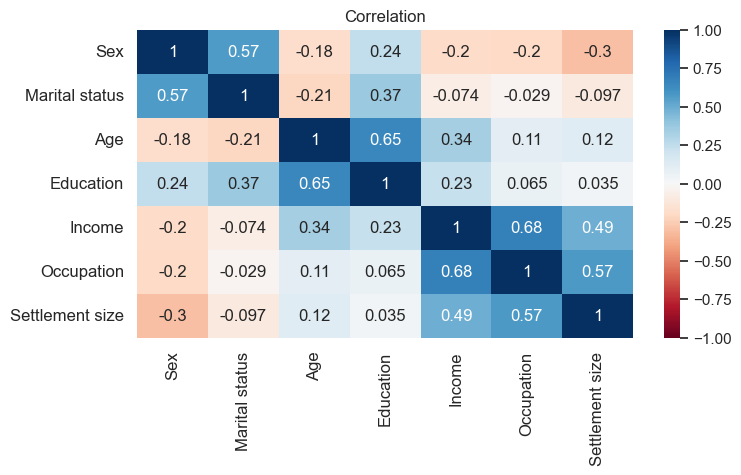

In [22]:
plt.figure(figsize=(8,4))
s = sns.heatmap(df.corr(), 
                annot= True,
                cmap ='RdBu',
                vmin = -1,
                vmax = 1)

s.set_yticklabels(s.get_yticklabels(),rotation=0, fontsize =12)
s.set_xticklabels(s.get_xticklabels(),rotation= 90, fontsize =12)
plt.title("Correlation")
plt.show()

### Visualise the data 

In [23]:
df.head(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2


Text(0.5, 1.0, 'Visualisation of raw data')

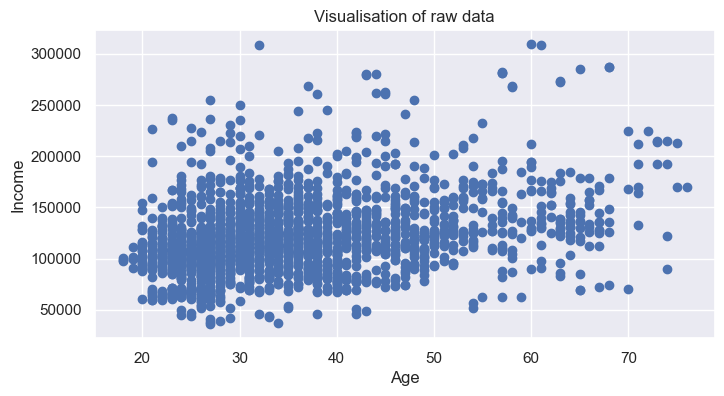

In [24]:
plt.figure(figsize =(8,4))
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualisation of raw data')

### Standardization 

In [26]:
# you alraedy standardise whilst doing it 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

### Hierarcial clustering 

In [47]:
#ward = distance
hier_clust= linkage(segmentation_std,method ='ward')

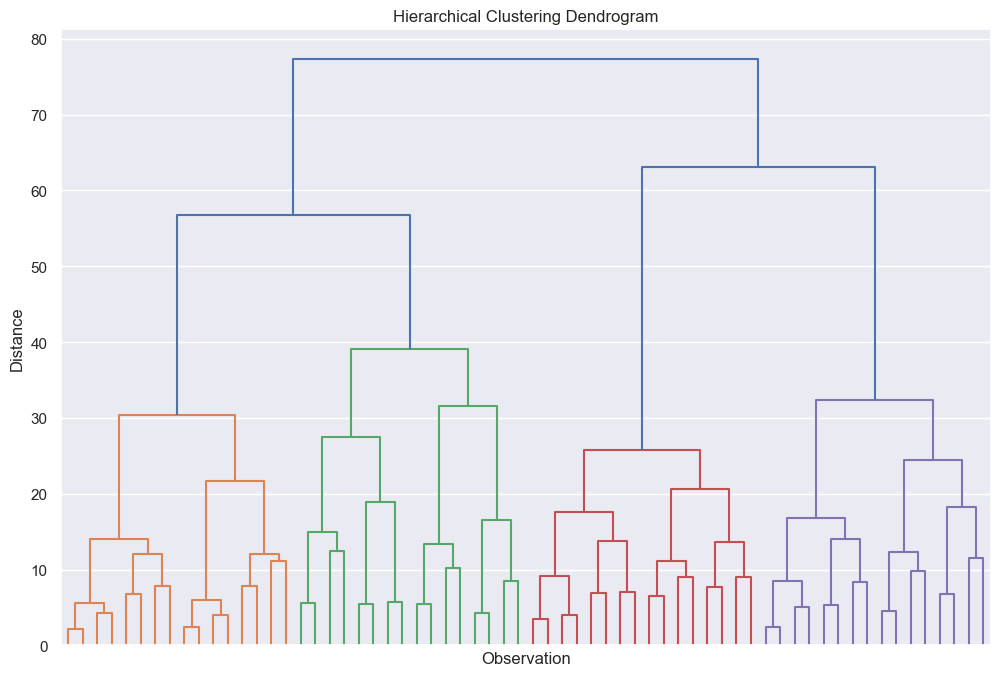

In [48]:
#plot it with dendrogram
plt.figure(figsize=(12,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode ='level',
           p=5 , # 5 level of groups 
          show_leaf_counts= False,
            no_labels= True)
#             color_threshold= 0)
plt.show()

#how to choose the cut 
#we need to find a horizontal line on the dendrogram on which to cut
#Rule of thumb: we find the longest vertical line unintercepted by a horizontal line from the dendrogram. 

### K-means Clustering 

In [49]:
#now we have 4 clusters 

"""k-means """
#Choose number of clusters
#specifiy cluster seeds (starting centroid - random or based on the choice)
#calculate the centroid or the geometrical centre
#The squared Euclidean distance is quite sensitive to outliers -> Solved by K-median clustering

"if chosen k is too small the centroid will not lie inside the clusters"
"if k is too large, some of the clusters may be split into two "
"k means enforces spherical clsuters "

'k means enforces spherical clsuters '

In [52]:
'''Determine Number of Clusters
K=2, K=3 ( change the K and comapre), WCSS for K {1,...,10} '''

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init='k-means++', random_state= 42)
    kmeans.fit(segmentationdf_se
               _std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Kmeans Clustering')

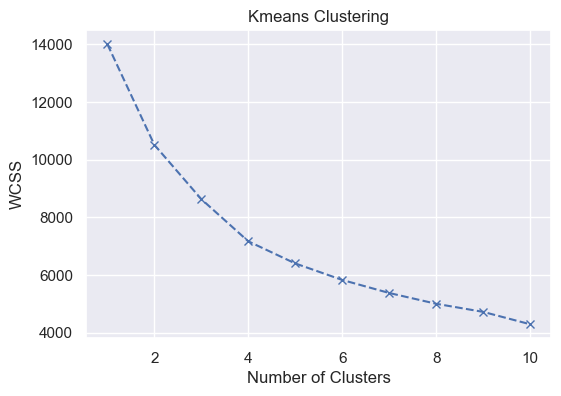

In [56]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss,linestyle='--',marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans Clustering')

### Elbow Method 

In [63]:
#kmeans=4 is the best -> after 4 the decrease is smooth
kmeans= KMeans(n_clusters=4 ,init='k-means++', random_state=42)

In [64]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### Results

In [65]:
df_segm_kmeans= df.copy()
df_segm_kmeans['Segment K-means'] =kmeans.labels_
#prediction can be printed with 'labels_'

In [66]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()

In [67]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [70]:
df_segm_analysis['N_obs']=df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()


In [72]:
df_segm_analysis['Prop Obs']= df_segm_analysis['N_obs']/df_segm_analysis['N_obs'].sum()

In [77]:
df_segm_analysis.rename({0:'well-off',1:'fewer-opportunities',3:'standard',4:'career focused'},inplace=True)
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [92]:
#add labels to df_segm_analysis with map() method
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map(
    {0:'well-off',
     1:'fewer-opportunities',
     2:'standard',
     3:'career focused'})

/Users/viviankim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


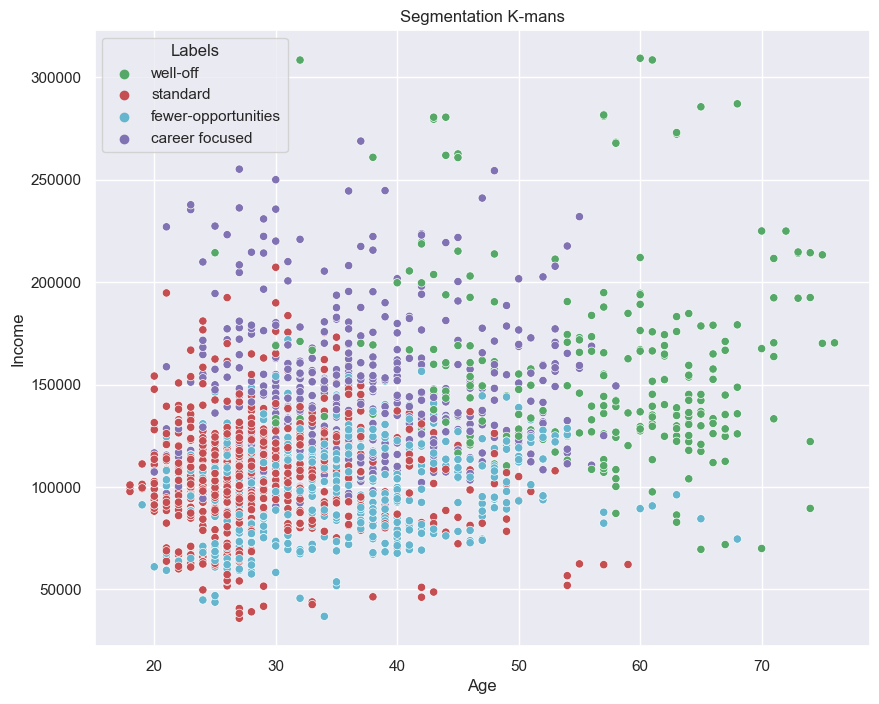

In [95]:
x_axis  = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue= df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-mans')
plt.show()

### How can we go even further digging into the data  -PCA Analysis

In [97]:
#import pca 
pca=PCA()

In [98]:
#fit 
pca.fit(segmentation_std)

PCA()

In [102]:
# 7 components, and 7 new variables are created - 100% of variablitiy of data 
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cummulative explained Variance')

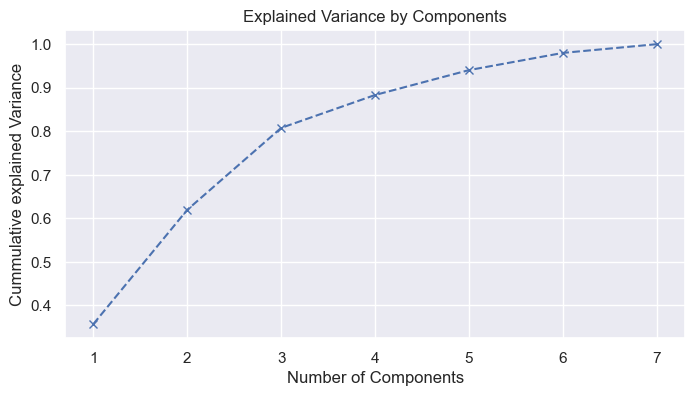

In [110]:
#find a subset of components, whilst preserving variance 
plt.figure(figsize=(8,4))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='x',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative explained Variance
           
#if you choose 2 components you preserve 60%

### Rule of thumb keep 80% of variance ( so 3-4 components )

In [112]:
# rule of thumb keep 80% of variance ( so 3-4 components )
'''presume we chose 3 components'''

pca=PCA(n_components=3)

In [113]:
pca.fit(segmentation_std)

PCA(n_components=3)

### analyse the PCA result 

In [114]:
# 3x7
pca.components_
#loading = correlation between an origian lvariable and a component 

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [117]:
df_pca_comp = pd.DataFrame(data= pca.components_ ,
                           columns = df.columns.values,
                           index=['Component1', 'Component2', 'Component3']
                          )
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


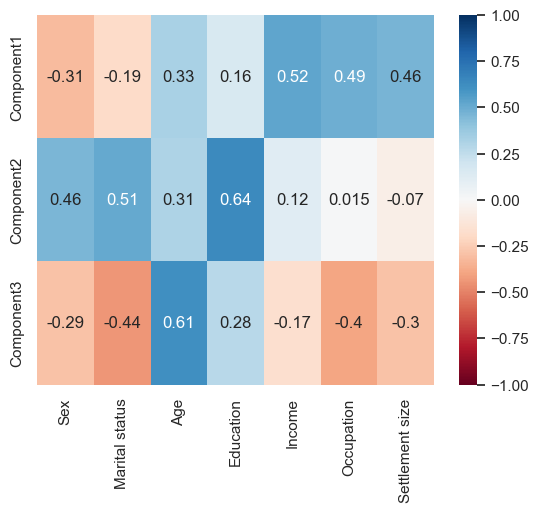

In [134]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks=([0,1,2],['Component1', 'Component2', 'Component3'])

Exmamine
component1:career focused individual ( income,occupation, settlmentsize)
component2: inidivdual education and lifestyle ( careeer related features are not important) 
component3: age and marital status and occupation are most improtant determinance

In [136]:
#now you have 3 components after tasnformimg the data
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [137]:
scores_pca= pca.transform(segmentation_std)

### K-means clustering with PCA

#### Component Scores are standardized by definition 

In [139]:
wcss=[]
for i in range(1,11):
    kmeans_pca =KMeans(n_clusters = i, init='k-means++', random_state= 42)
    kmeans_pca .fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'Kmeans with PCA clustering')

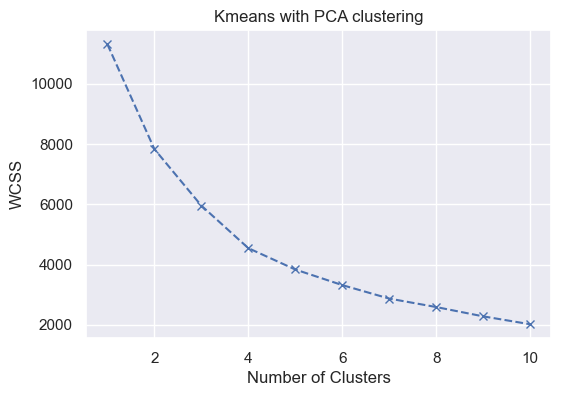

In [140]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss,linestyle='--',marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA clustering')

In [143]:
#still 4 seems to be the prominent one
kmeans_pca =KMeans(n_clusters=4, init='k-means++',random_state=42)

In [144]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [153]:
kmeans_pca.labels_

array([3, 0, 2, ..., 2, 0, 2], dtype=int32)

### K-means clustering with PCA Results 

In [156]:
df_segm_pca_kmeans= pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:]=['Component1','Component2','Component3'] (#labelling them -change name)
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [158]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [159]:
df_segm_pca_kmeans_freq= df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()

In [176]:
df_segm_pca_kmeans_freq=df_segm_pca_kmeans_freq.reset_index()

In [180]:
df_segm_pca_kmeans_freq ['N_obs']=df_segm_pca_kmeans_freq [['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq ['Prop Obs']=df_segm_pca_kmeans_freq ['N_obs']/df_segm_pca_kmeans_freq ['N_obs'].sum()

#add labels to df_segm_analysis with map() method
# df_segm_pca_kmeans_freq['Labels'] = df_segm_pca_kmeans_freq['Segment K-means PCA'].map(
#     {0:'well-off',
#      1:'fewer-opportunities',
#      2:'standard',
#      3:'career focused'})

df_segm_pca_kmeans_freq=  df_segm_pca_kmeans_freq.rename(  {0:'well-off',
     1:'fewer-opportunities',
     2:'standard',
     3:'career focused'})


In [181]:
df_segm_pca_kmeans_freq

,Segment K-means PCA,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component1,Component2,Component3,N_obs,Prop Obs,Labels
well-off,0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,1,0.25,well-off
fewer-opportunities,1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,1,0.25,fewer-opportunities
standard,2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,1,0.25,standard
career focused,3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,1,0.25,career focused


In [192]:
df_segm_pca_kmeans['Legend']= df_segm_pca_kmeans['Segment K-means PCA'].map(
    {0:'standard',
     1:'career-focused',
     2:'fewer opportunities',
     3:'well-off'})

/Users/viviankim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


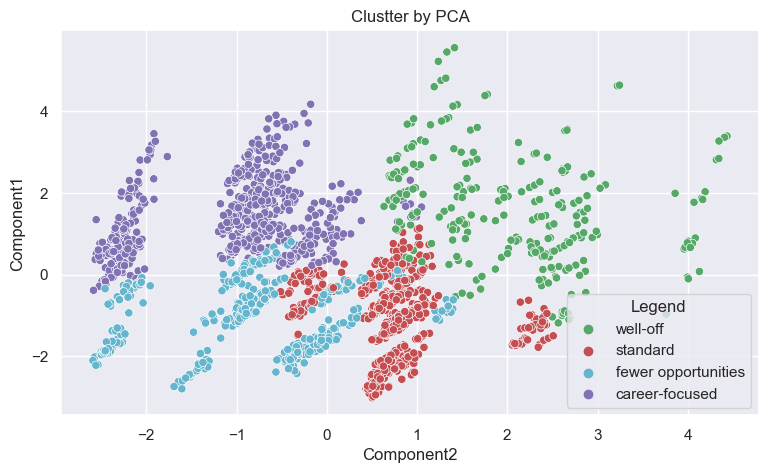

In [193]:
x_axis = df_segm_pca_kmeans['Component2']
y_axis = df_segm_pca_kmeans['Component1']
plt.figure(figsize=(9,5))
sns.scatterplot(x_axis,y_axis, hue=df_segm_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clustter by PCA')
plt.show()


/Users/viviankim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


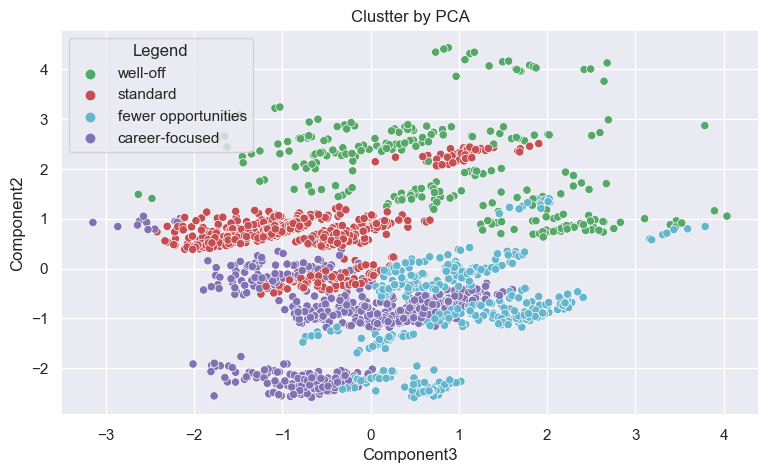

In [195]:
x_axis = df_segm_pca_kmeans['Component3']
y_axis = df_segm_pca_kmeans['Component2']
plt.figure(figsize=(9,5))
sns.scatterplot(x_axis,y_axis, hue=df_segm_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clustter by PCA')
plt.show()


### Data Export 

In [200]:
# you need a scaler to pre-process the data

pickle.dump(scaler,open('sacler.pickle','wb'))

In [201]:
pickle.dump(pca,open('pca_pickle','wb'))

In [202]:
pickle.dump(kmeans_pca,open('kmeans_pca_pickle','wb'))